<a href="https://colab.research.google.com/github/imarkhvida/Rail_Recognition/blob/main/LogReg_Python_Rail_Recognition_12_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/LogisticRegression/')

In [3]:
# Use seaborn for pairplot
!pip install -q seaborn
#!cp /content/drive/MyDrive/LogisticRegression/Model.py 

# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from Model import LogisticRegressionUsingGD
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

#!python --version

def load_data(path, header):
    dataframe = pd.read_csv(path, header=header)
    return dataframe

if __name__ == "__main__":
    # path /content/drive/MyDrive/Rail_Features_test80.csv
    data = load_data("/content/drive/MyDrive/061808162020STR489_features_12_No_NULLs.csv",0)
    print(data.info())
    print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8502 entries, 0 to 8501
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rail_candidate   8502 non-null   object 
 1   sigma            8502 non-null   float64
 2   sigma_head       8502 non-null   float64
 3   sigma_base       8502 non-null   float64
 4   overheight       8502 non-null   float64
 5   underheight      8502 non-null   float64
 6   underboth        8502 non-null   float64
 7   thickover        8502 non-null   float64
 8   thickunder       8502 non-null   int64  
 9   filletover       8502 non-null   float64
 10  filletunder      8502 non-null   float64
 11  faceslope_angle  8502 non-null   float64
 12  camera_ang       8502 non-null   float64
 13  real_rail        8502 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 930.0+ KB
None
  rail_candidate      sigma  sigma_head  ...  faceslope_angle  camera_ang  real_rail
0 

##Inspect the Data

In [4]:
my_rail = '''RE136'''
data["target"] = np.where(data['real_rail']==my_rail,1,0).astype('int32')
data = data.drop(columns = ['rail_candidate'])
data = data[['sigma','overheight','underheight','underboth','thickover','thickunder','filletover','filletunder','faceslope_angle','camera_ang','target','real_rail']]
data.head(3)

,sigma,overheight,underheight,underboth,thickover,thickunder,filletover,filletunder,faceslope_angle,camera_ang,target,real_rail
0,35.830868,20.035670,20.834937,19.090937,1.147384,0,7.805584,5.635136,0.45153,1.098054,1,RE136
1,5.173964,11.306652,0.000000,0.000000,0.080406,0,0.000000,0.000000,0.00000,0.803621,1,RE136
2,0.689708,0.879124,20.834937,0.223484,1.147384,0,7.805584,5.635136,0.45153,0.619633,1,RE136


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


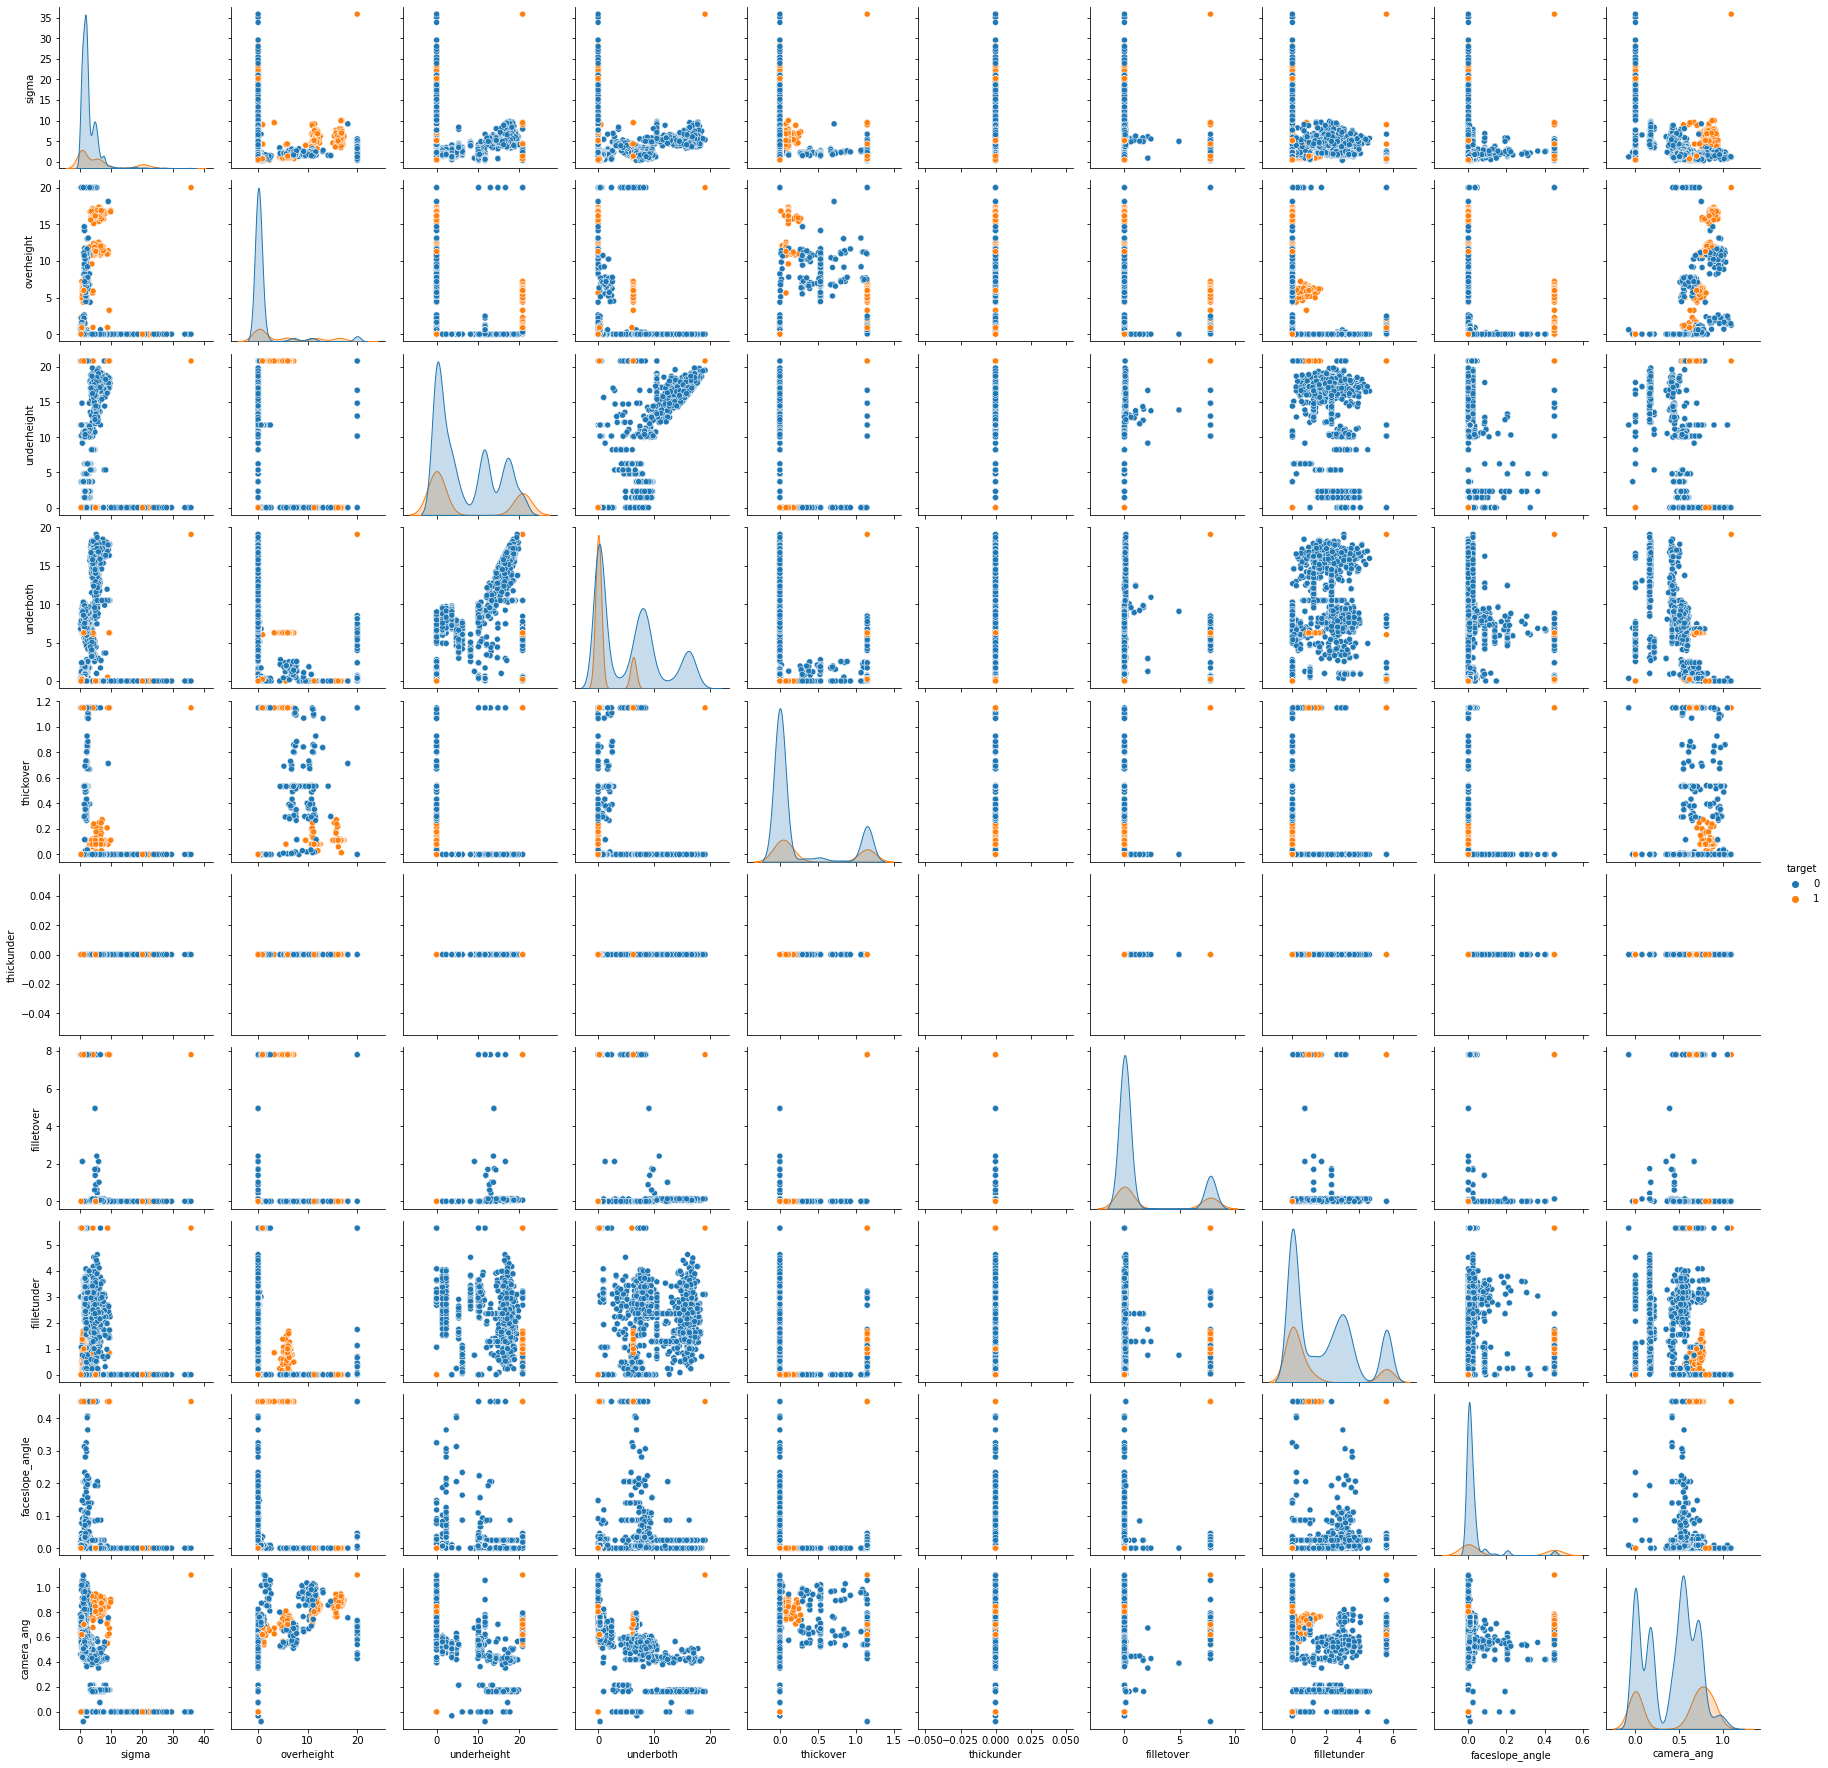

In [5]:
sns.pairplot(data, hue = 'target', diag_kind='kde')

In [6]:
 # X class 'pandas.core.frame.DataFrame' = feature values, all the columns except the last 2 columns. 
    
X = data.iloc[:, :-2]
#X = data.iloc[:, 0:1]
X.head(3)

    # y = target values, last column of the data frame
y = data.iloc[:, -2]
y.head(3)

0    1
1    1
2    1
Name: target, dtype: int32

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


The accuracy of the model is 91.95483415666902
The model parameters using Gradient descent


[-1.49786649  0.11741319  0.08674994  0.45277148 -1.46534932 -5.34849283
  0.          0.07202595 -1.37765545 17.02479454  1.56988898]


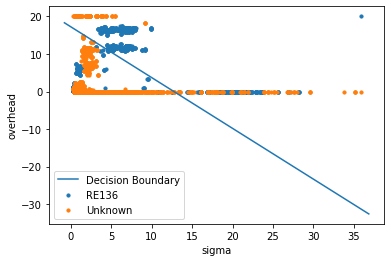

In [7]:
    # filter out the applicants that got admitted
    admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = data.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],s=10, label=my_rail)
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,
                label='Unknown')
    
    # preparing the data for building the model
    X = np.c_[np.ones((X.shape[0], 1)), X]
    y = y[:, np.newaxis]
    theta = np.zeros((X.shape[1], 1))

    # Logistic Regression from scratch using Gradient Descent
    model = LogisticRegressionUsingGD()
    model.fit(X, y, theta)
    accuracy = model.accuracy(X, y.flatten())
    parameters = model.w_
    print("The accuracy of the model is {}".format(accuracy))
    print("The model parameters using Gradient descent")
    print("\n")
    print(parameters)

    # plotting the decision boundary
    # As there are two features
    # wo + w1x1 + w2x2 = 0
    # x2 = - (wo + w1x1)/(w2)
    #print (X)
    x_values = [np.min(X[:, 1] -1 ), np.max(X[:, 1] + 1)]
    #print (x_values)
    y_values = - (parameters[0] + np.dot(parameters[1], x_values))/parameters[2]

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('sigma')
    plt.ylabel('overhead')
    plt.legend()
    plt.show()

In [8]:
    # Using scikit-learn
    model = LogisticRegression()
    model.fit(X, y)
    parameters = model.coef_
    predicted_classes = model.predict(X)
    accuracy = accuracy_score(y.flatten(),predicted_classes)
    print('The accuracy score using scikit-learn is {}'.format(accuracy))
    precision = precision_score(y.flatten(),predicted_classes)
    print('The precision score using scikit-learn is {}'.format(precision))
    print("The model parameters using scikit learn")
    print(parameters)

The accuracy score using scikit-learn is 0.9191954834156669
The precision score using scikit-learn is 0.8275290215588723
The model parameters using scikit learn
[[-0.5574462   0.12018777  0.04536551  0.37804942 -1.22256303 -4.36175337
   0.          0.37828526 -1.29183055  9.23000848  1.90455155]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
